In [ ]:
## standart libraries
import os,sys
import numpy as np

# xarray
import xarray as xr
    
# plot
import cartopy.crs as ccrs
import cartopy.feature as ccf
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import scipy.io

%matplotlib inline 

In [100]:
### local (my laptop)
diri = "/Users/leroux/DATA/OCCIPUT_DATA/ORCA025.L75/MOC/"
fili = "AMOCSIG.ORCA025.L75-OCCITENS.1960-2015.nc"

# Read AMOC monthly dataset
(all 50 members)

In [101]:
amoc = xr.open_dataset(diri+fili)['amoc']

# Examples using the AMOC dataset

* __Very simple plot of the timeseries of amoc at 26N for member #1 and member #10 :__

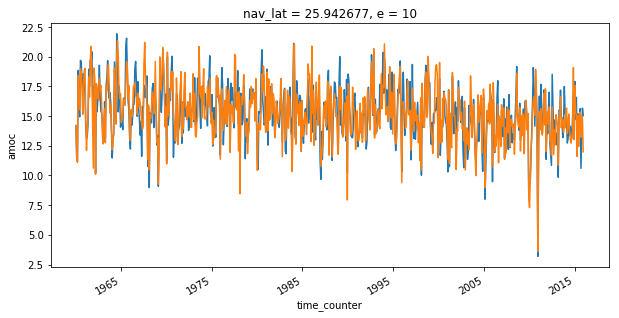

In [108]:
rapidmb1 = amoc.sel(nav_lat=26.,method='nearest',e=1)
rapidmb2 = amoc.sel(nav_lat=26.,method='nearest',e=10)

# plot 
fig1 = plt.figure(figsize=([10,5]),facecolor='white')  
rapidmb1.plot()
rapidmb2.plot()

* __Compute and plot ensemble-mean AMOC and ensemble-std AMOC at a given latitude:__

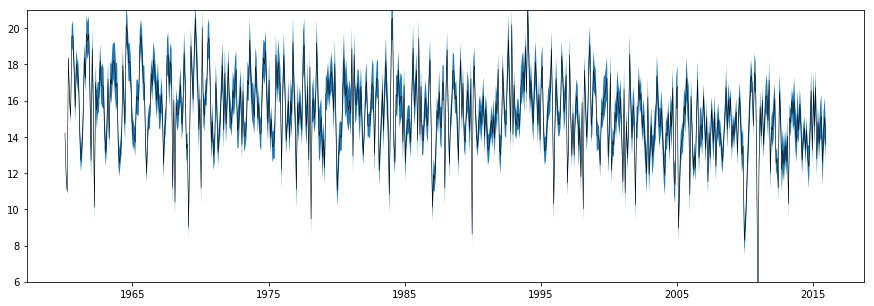

In [166]:
# choose latitude
latchoice = 26.

emean = amoc.mean(dim='e')
estd  = amoc.std(dim='e')

emeanplus = emean+estd
emeanminus = emean-estd


y  = emean.sel(nav_lat=latchoice,method='nearest')
yp = emeanplus.sel(nav_lat=latchoice,method='nearest')
ym = emeanminus.sel(nav_lat=latchoice,method='nearest')

x=emean.time_counter.values

# plot
fig2 = plt.figure(figsize=([15,5]),facecolor='white')  

# emean (black)
plt.plot(x,y,color='k',linewidth=0.5)
# emean +/- 1sd shaded (blue)
plt.fill_between(x,ym,yp)

plt.ylim( 6., 21. )  

plt.show()



--> note that there is a large seasonal cycle that blurs the above plot. Below i show an example where the seasonal cycle is first remove.

* __Time-mean value of the e-std at 34.5S:__

In [156]:
latchoice = -34.5
tmestd = estd.sel(nav_lat=latchoice,method='nearest').mean(dim='time_counter')
tmestd.values

array(1.72815234)

--> consistent with the e-spread values i had of the monthly amoc in my previous study (see fig from DRAKKAR meeting)